## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Car_Crash.csv')

In [3]:
df.head()

sno  dvcat  weight      Survived  airbag seatbelt  frontal sex  ageOFocc   
0    0    55+  27.078  Not_Survived    none     none        1   m        32  \
1    1  25-39  89.627  Not_Survived  airbag   belted        0   f        54   
2    2    55+  27.078  Not_Survived    none   belted        1   m        67   
3    3    55+  27.078  Not_Survived    none   belted        1   f        64   
4    4    55+  13.374  Not_Survived    none     none        1   m        23   

   yearacc  yearVeh     abcat occRole  deploy  injSeverity       caseid  
0     1997     1987   unavail  driver       0          4.0      2:13:02  
1     1997     1994  nodeploy  driver       0          4.0      2:17:01  
2     1997     1992   unavail  driver       0          4.0  0.138206019  
3     1997     1992   unavail    pass       0          4.0  0.138206019  
4     1997     1986   unavail  driver       0          4.0      4:58:01

In [4]:
df.describe()

sno        weight       frontal      ageOFocc       yearacc   
count  11217.000000  11217.000000  11217.000000  11217.000000  11217.000000  \
mean    5608.000000    431.405309      0.644022     37.427654   2001.103236   
std     3238.213319   1406.202941      0.478830     18.192429      1.056805   
min        0.000000      0.000000      0.000000     16.000000   1997.000000   
25%     2804.000000     28.292000      0.000000     22.000000   2001.000000   
50%     5608.000000     82.195000      1.000000     33.000000   2001.000000   
75%     8412.000000    324.056000      1.000000     48.000000   2002.000000   
max    11216.000000  31694.040000      1.000000     97.000000   2002.000000   

            yearVeh        deploy   injSeverity  
count  11217.000000  11217.000000  11140.000000  
mean    1994.177944      0.389141      1.825583  
std        5.658704      0.487577      1.378535  
min     1953.000000      0.000000      0.000000  
25%     1991.000000      0.000000      1.000000  
50%     1995.000000      0.000000      2.000000  
75%     1999.000000      1.000000      3.000000  
max     2003.000000      1.000000      5.000000

In [4]:
df.shape

(11217, 16)

In [7]:
df.isnull().sum()

sno             0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

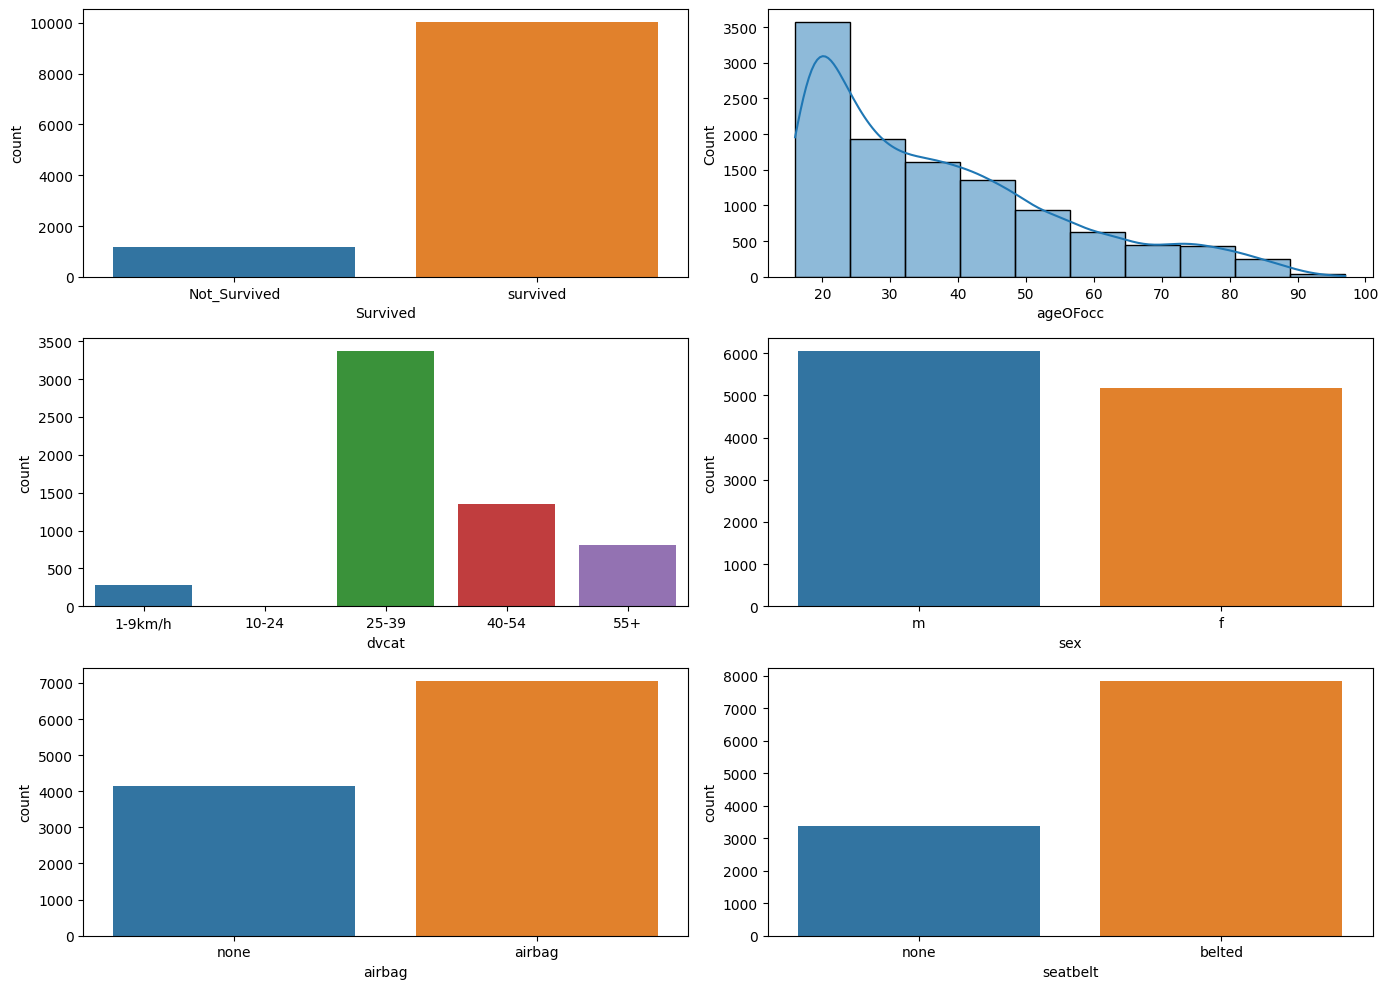

In [8]:
# Univariate Analysis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
sns.histplot(df['ageOFocc'], bins=10, kde=True, ax=axes[0, 1])
sns.countplot(x='dvcat', data=df, order=['1-9km/h', '10-24', '25-39', '40-54', '55+'], ax=axes[1, 0])
sns.countplot(x='sex', data=df, ax=axes[1, 1])
sns.countplot(x='airbag', data=df, ax=axes[2, 0])
sns.countplot(x='seatbelt', data=df, ax=axes[2, 1])
plt.tight_layout()

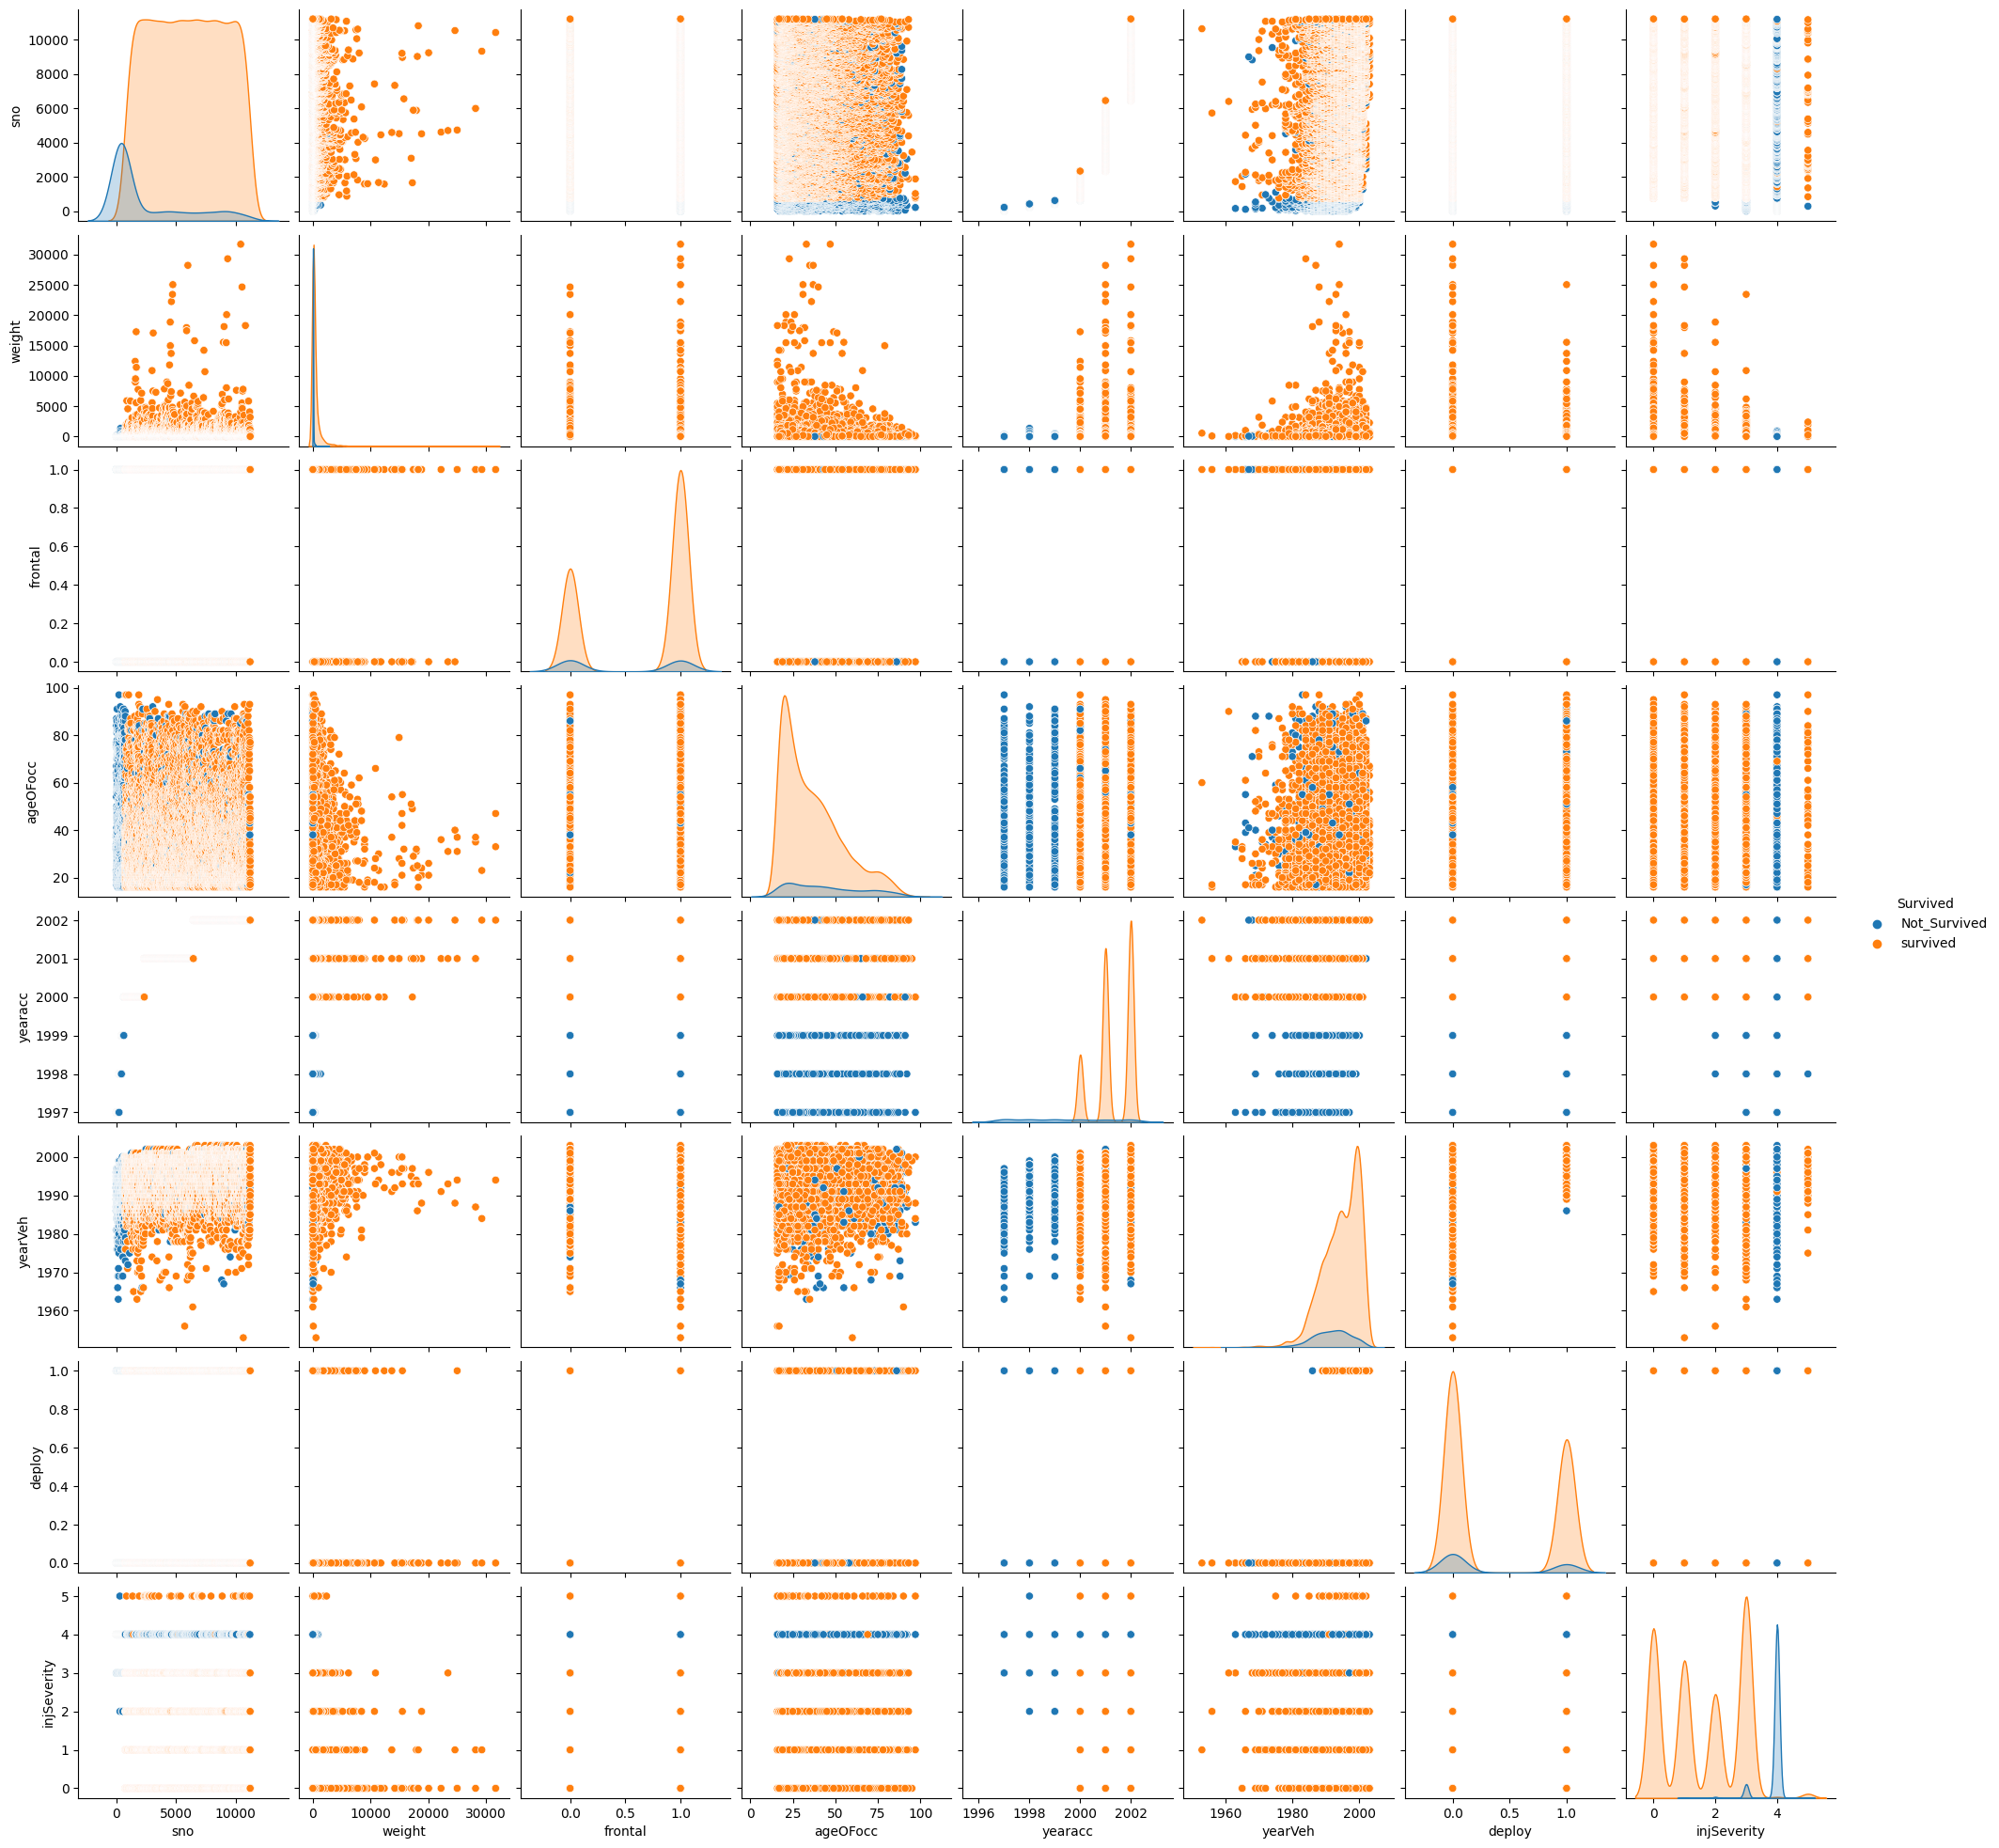

In [9]:
# Bivariate Analysis
sns.pairplot(df, hue='Survived')
plt.show()

# Model Creation and Data Encoding

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoders = {}
categorical_columns = ['dvcat', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole', 'Survived'] # Add other categorical columns as needed
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
# Split the data
X = df.drop(['Survived', 'caseid'], axis=1) # Dropping 'caseid' as it's just an identifier
y = df['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
# Apply Logistic Regression and LDA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
lr_model = LogisticRegression(max_iter=1000)

In [16]:
lda_model = LinearDiscriminantAnalysis()

In [20]:
y_train.head()

6057     1
8164     1
6693     1
10667    1
1317     1
Name: Survived, dtype: int32

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy='mean')

In [24]:
X_train_imputed = imputer.fit_transform(X_train)

In [25]:
X_test_imputed = imputer.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [27]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay

In [37]:
def model_performance(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred)}")
    print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred)}")
    print(f"Confusion Matrix on Test Set:\n {confusion_matrix(y_test, y_test_pred)}")
    RocCurveDisplay.from_estimator(lda_model, X_test, y_test)
    plt.show()
    print(f"ROC AUC Score on Test Set: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")


Logistic Regression Performance:
Accuracy on Train Set: 0.9811488982295249
Accuracy on Test Set: 0.9783125371360666
Confusion Matrix on Test Set:
 [[ 332   51]
 [  22 2961]]


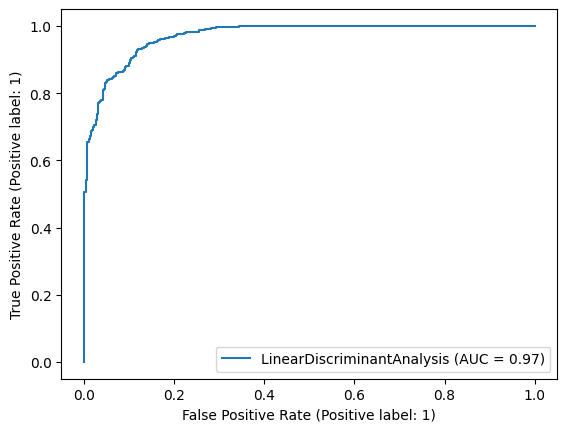

ROC AUC Score on Test Set: 0.989039719419618


In [38]:
print("Logistic Regression Performance:")
model_performance(lr_model, X_train, y_train, X_test, y_test)


LDA Performance:
Accuracy on Train Set: 0.9574576487071711
Accuracy on Test Set: 0.9581105169340464
Confusion Matrix on Test Set:
 [[ 244  139]
 [   2 2981]]


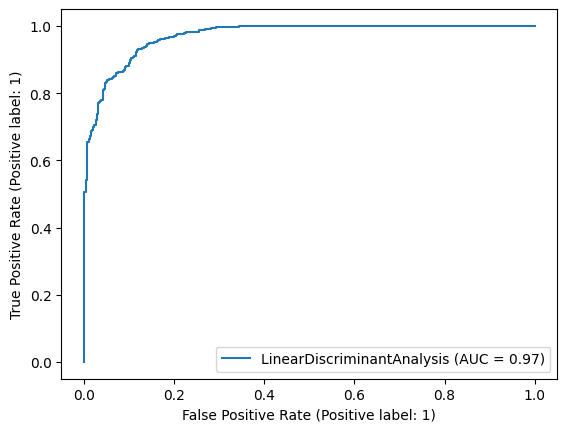

ROC AUC Score on Test Set: 0.9706124085220952


In [39]:
print("LDA Performance:")
model_performance(lda_model, X_train, y_train, X_test, y_test)